# Análise Eploratória de Dados
## Trabalho realizado para GEIA

In [2]:
import numpy as np 
import pandas as pd
import os 

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+",names=column_names)

print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


| Coluna | Descrição | 
| ------- | --------------------------| 
| `CRIM` |  Taxa de criminalidade per capita na região | 
| `ZN` |   Proporção de terrenos residenciais com lotes maiores que 25.000 pés²|
| `INDUS` | Proporção de acres de negócios não varejistas por cidade (índice de zonas industriais) |
|`CHAS`| Variável binária: 1 se o imóvel está próximo ao rio Charles, 0 caso contrário.|
|`NOX`|Concentração de óxidos nítricos no ar (poluição), em partes por 10 milhões.|
|`RM`|Número médio de cômodos por habitação.|
|`AGE`|Proporção de unidades construídas antes de 1940 (idade das casas, em percentual).|
|`DIS`|Distâncias ponderadas a cinco principais centros de emprego de Boston.|
|`RAD`|Índice de acessibilidade às rodovias radiais.|
|`TAX`|Taxa de imposto predial por US$ 10.000.|
|`PTRATIO`|Razão aluno-professor nas escolas da cidade.|
|`B`|Fórmula: 1000(Bk - 0.63)², onde Bk é a proporção de negros por cidade (esta variável hoje é alvo de críticas por viés racial).|
|`LSTAT`|Percentual da população com "status socioeconômico mais baixo".|
|`MEDV`|Valor mediano das casas ocupadas pelos proprietários (em milhares de dólares).|


In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df_sem_nan = data.dropna(axis=0, how='any')
df_sem_duplicado = data.drop_duplicates(keep='first')
df_sem_valor_neg = data[data['MEDV'] >= 0]

print(f'Total de linhas nulas: {len(data) - len(df_sem_nan)}')
print(f'Total de linhas duplicadas: {len(data) - len(df_sem_duplicado)}')
print(f'Total de casas com valor estimado negativo: {len(data) - len(df_sem_valor_neg)}')

Total de linhas nulas: 0
Total de linhas duplicadas: 0
Total de casas com valor estimado negativo: 0


In [12]:
dimensions = np.shape(data)
print(f'Dimesões do dataset: {dimensions}')
print("------")
print("Medidas estatísticas dos valores estimados de casas")
#tendencias centrais dos valores estimados de casas
media = round(data['MEDV'].mean(), 2)

mediana = round(data['MEDV'].median(), 2)

moda = round(data['MEDV'].mode().values[0], 2)

print(f'Média: {media}')
print(f'Moda: {moda}')
print(f'Mediana: {mediana}')

#tendencias de dispersão dos valores estimados de casas
variancia = round(data['MEDV'].var(), 2)

desvio_padrao = round(data['MEDV'].std(), 2)

cv = (desvio_padrao/media) * 100
print(f'Coeficiente de variação: {round(cv, 2)}%')


Dimesões do dataset: (506, 14)
------
Medidas estatísticas dos valores estimados de casas
Média: 22.53
Moda: 50.0
Mediana: 21.2
Coeficiente de variação: 40.83%


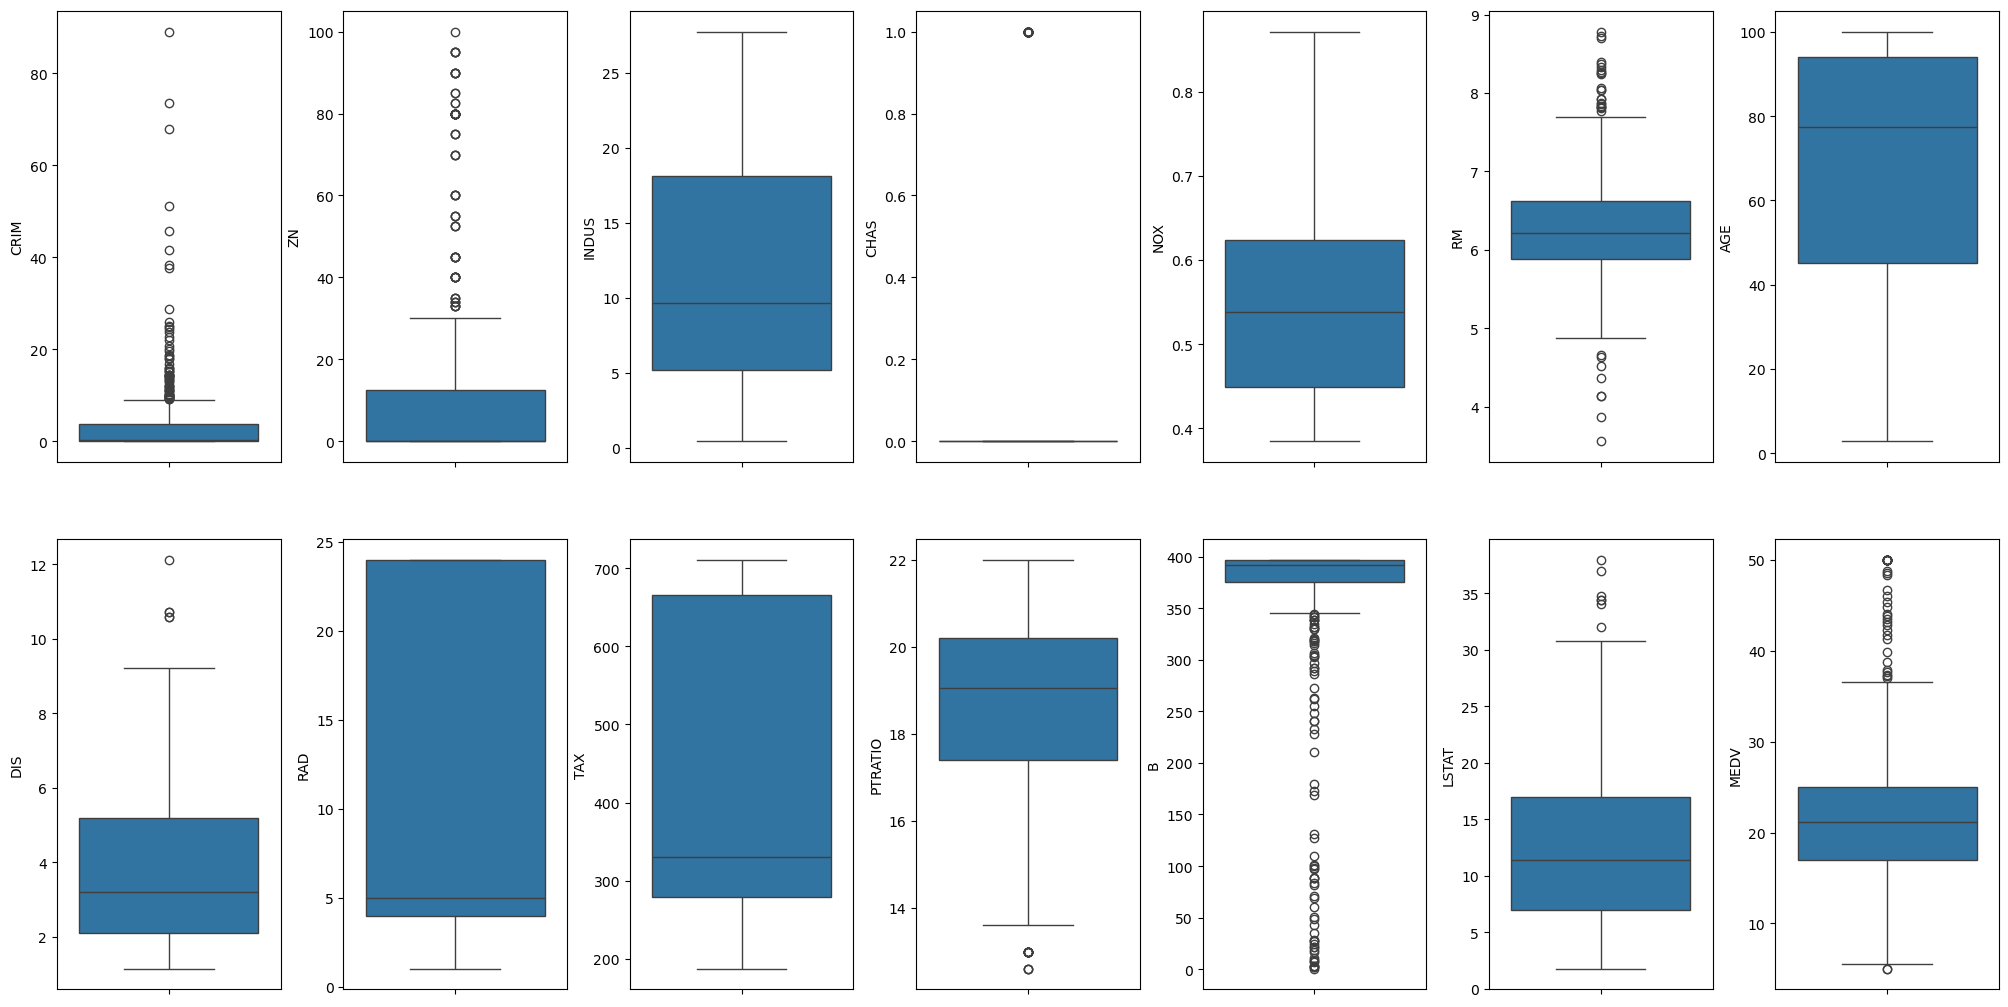

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index =  0
axs = axs.flatten()
for k, v in data.items():
    sns.boxplot(y=k, data=data, ax = axs[index])
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [14]:
#Calculando porcentagem de outliers
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5 * iqr ) | (v >=q3 + 1.5 * iqr)]
    percentagem = np.shape(v_col)[0] * 100 / np.shape(data)[0]
    print("Porcentagem de outliers da coluna %s:  %.2f%%" % (k, percentagem))

Porcentagem de outliers da coluna CRIM:  13.04%
Porcentagem de outliers da coluna ZN:  13.44%
Porcentagem de outliers da coluna INDUS:  0.00%
Porcentagem de outliers da coluna CHAS:  100.00%
Porcentagem de outliers da coluna NOX:  0.00%
Porcentagem de outliers da coluna RM:  5.93%
Porcentagem de outliers da coluna AGE:  0.00%
Porcentagem de outliers da coluna DIS:  0.99%
Porcentagem de outliers da coluna RAD:  0.00%
Porcentagem de outliers da coluna TAX:  0.00%
Porcentagem de outliers da coluna PTRATIO:  2.96%
Porcentagem de outliers da coluna B:  15.22%
Porcentagem de outliers da coluna LSTAT:  1.38%
Porcentagem de outliers da coluna MEDV:  7.91%


In [28]:
import statistics
def media(v):
    return sum(v) / len(v)

def covariancia_amostral(x, y):
    S = 0 
    n = len(x)
    media_x = media(x)
    media_y = media(y)
    for i in range(n):
        S += (x[i] - media_x) * (y[i] - media_y)
    return S/(n-1)

x1 = data['RM'].values
y1 = data['MEDV'].values
print("Covariancia entre número de comodos e valor médio de casas:")
print(f'Cálculo manual: {round(covariancia_amostral(x1, y1), 2)}')
print(f'Biblioteca Statistics: {round(statistics.covariance(x1, y1),2)}')

x2 = data['CRIM'].values
y2 = data['MEDV'].values
print("Covariancia entre taxa de criminalidade e valor médio de casas:")
print(f'Cálculo manual: {round(covariancia_amostral(x2, y2), 2)}')
print(f'Biblioteca Statistics: {round(statistics.covariance(x2, y2),2)}')

Covariancia entre número de comodos e valor médio de casas:
Cálculo manual: 4.49
Biblioteca Statistics: 4.49
Covariancia entre taxa de criminalidade e valor médio de casas:
Cálculo manual: -30.72
Biblioteca Statistics: -30.72


In [33]:
def correlacao_pearson(x, y):
    S1 = 0
    S2 = 0
    S3 = 0
    media_x = media(x)
    media_y = media(y)

    n = len(x)
    for i in range(n):
        S1 += (x[i] - media_x) * (y[i] - media_y)
        S2 += (x[i] - media_x) ** 2
        S3 += (y[i] - media_y) ** 2
    return S1 / ((S2 ** 0.5) * (S3 ** 0.5))

print("Correlação de Pearson entre Número de comodos e valor estimado de casas")
print(f'Correlação manual: {correlacao_pearson(x1, y1)}')
print(f'Biblioteca statistics: {statistics.correlation(x1,y1)}')

print("Correlação de Pearson entre taxa de criminalidade e valor estimado de casas")
print(f'Correlação manual: {correlacao_pearson(x2, y2)}')
print(f'Biblioteca statistics: {statistics.correlation(x2,y2)}')

Correlação de Pearson entre Número de comodos e valor estimado de casas
Correlação manual: 0.695359947071539
Biblioteca statistics: 0.6953599470715388
Correlação de Pearson entre taxa de criminalidade e valor estimado de casas
Correlação manual: -0.3883046085868114
Biblioteca statistics: -0.38830460858681143


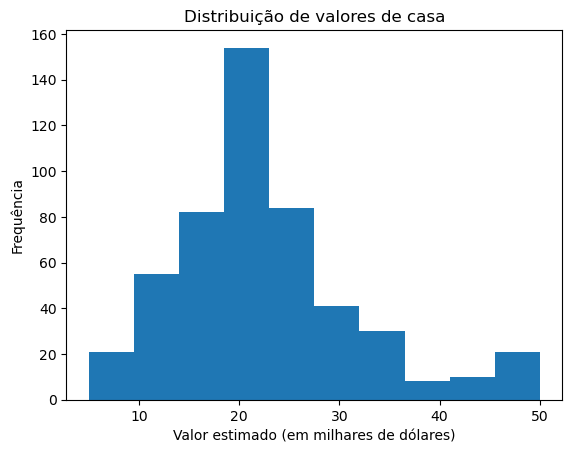

In [36]:
plt.hist(data['MEDV'])
plt.xlabel("Valor estimado (em milhares de dólares)")
plt.ylabel("Frequência")
plt.title("Distribuição de valores de casa")
plt.show()


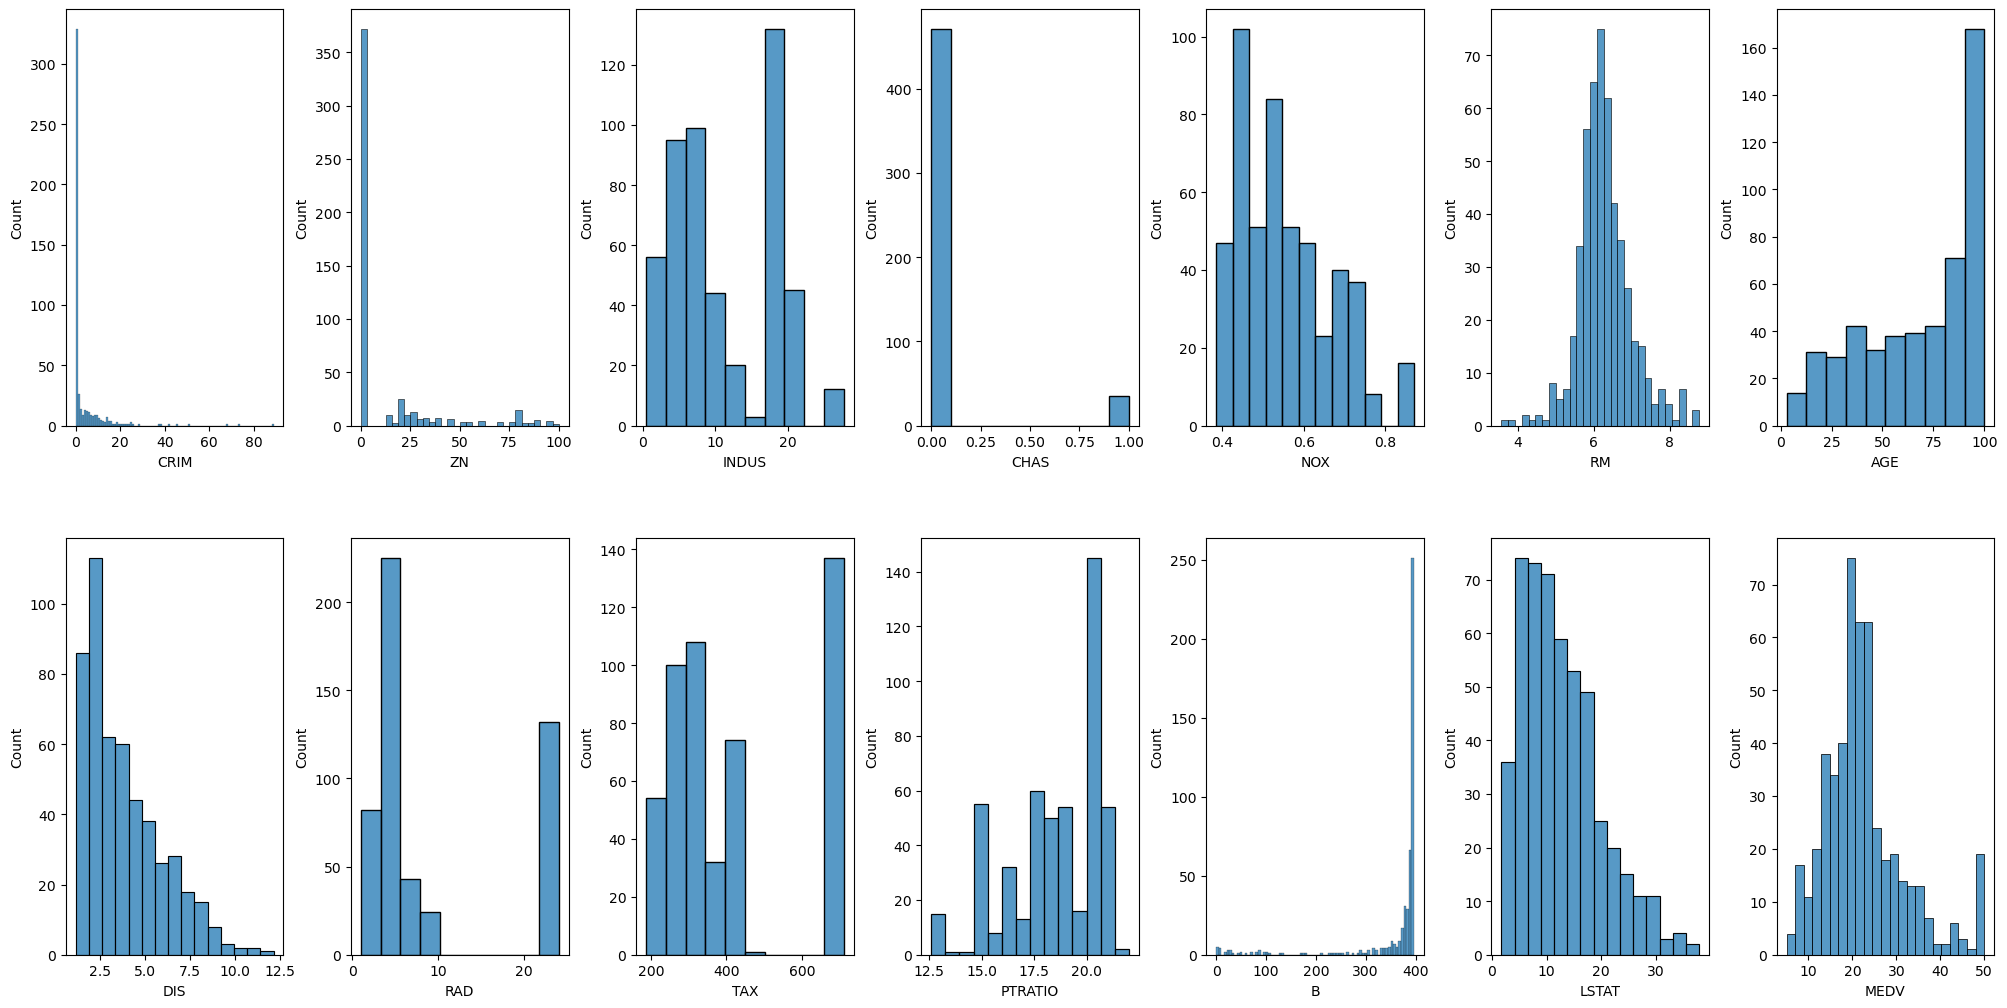

In [38]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)